# 

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from numpy import array
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error



In [120]:
data = pd.read_csv("airline-passengers.csv")
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Split Data

Training 0.8 dan Test 0.2

In [121]:
training_set = data.iloc[:115, 1:2].values
test_set = data.iloc[115:, 1:2].values
training_set =pd.DataFrame(training_set)
test_set =pd.DataFrame(test_set)

print((training_set).shape , (test_set).shape)

(115, 1) (29, 1)


## PreProsessing Minmax

In [122]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)
type(training_set_scaled)


numpy.ndarray

## transform to a supervised learning problem


In [124]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  
  return array(X), array(y)
# define univariate time series

# print(df.shape)
# transform to a supervised learning problem
X_train, y_train = split_sequence(training_set_scaled, 3) 
X_test, y_test = split_sequence(test_set_scaled, 3) 


In [125]:
newX_train = pd.DataFrame(X_train.reshape(112,3),columns=['Xt-2','Xt-1','Xt'])
newY_train = pd.DataFrame(y_train, columns=['Output'])
newX_test = pd.DataFrame(X_test.reshape(26,3),columns=['Xt-2','Xt-1','Xt'])
newY_test = pd.DataFrame(y_test, columns=['Output'])

In [126]:
new_data_passenger_test = pd.concat([newX_test,newY_test],axis=1)
new_data_passenger_train = pd.concat([newX_train,newY_train],axis=1)
new_data_passenger_train  

,Xt-2,Xt-1,Xt,Output
0,0.020672,0.036176,0.072351,0.064599
1,0.036176,0.072351,0.064599,0.043928
2,0.072351,0.064599,0.043928,0.080103
3,0.064599,0.043928,0.080103,0.113695
4,0.043928,0.080103,0.113695,0.113695
...,...,...,...,...
107,0.599483,0.609819,0.552972,0.666667
108,0.609819,0.552972,0.666667,0.630491
109,0.552972,0.666667,0.630491,0.669251
110,0.666667,0.630491,0.669251,0.855297


## Seleksi Fitur

In [127]:
y_train =new_data_passenger_train['Output'] 
X_train = new_data_passenger_train.drop(columns=['Output'])
y_test =new_data_passenger_test['Output'] 
y_test = np.array(y_test.index.values)
X_test = new_data_passenger_test.drop(columns=['Output'])

type(y_test)

numpy.ndarray

## Eksekusi Model KNN Regresi

In [128]:
n_nei = range(1,30)
acc = []
for i in n_nei:
    neigh = KNeighborsRegressor(n_neighbors=2)
    neigh.fit(X_train, y_train)
    # y_pred
    y_pred =neigh.predict(X_test)
    y_pred = y_pred.reshape(1,-1)
    y_pred = sc.inverse_transform(y_pred)

    # y_test reshape

    y_test = y_test.reshape(1,-1)
    y_test = sc.inverse_transform(y_test)

    # Mean absolute percentage error (MAPE) regression loss.
    percentage = mean_absolute_percentage_error(y_test,y_pred)
    acc.append(percentage)


## Plot Acc View

MAPE terbaik adalah  0.8276502939676521  dengan n_neighbors =  1


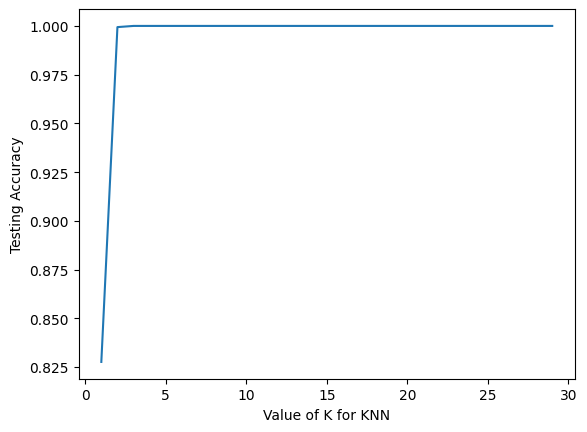

In [129]:
plt.plot(n_nei,acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

print(f"MAPE terbaik adalah ", min(acc) , " dengan n_neighbors = " , acc.index(min(acc)) +1)